In [46]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [47]:
# Read the CSV file
path = 'Data/mxmh_survey_results (1).csv'
survey_df = pd.read_csv(path)
survey_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [48]:
# Check DataFrame any null value
survey_df.count()

Timestamp                       736
Age                             735
Primary streaming service       735
Hours per day                   736
While working                   733
Instrumentalist                 732
Composer                        735
Fav genre                       736
Exploratory                     736
Foreign languages               732
BPM                             629
Frequency [Classical]           736
Frequency [Country]             736
Frequency [EDM]                 736
Frequency [Folk]                736
Frequency [Gospel]              736
Frequency [Hip hop]             736
Frequency [Jazz]                736
Frequency [K pop]               736
Frequency [Latin]               736
Frequency [Lofi]                736
Frequency [Metal]               736
Frequency [Pop]                 736
Frequency [R&B]                 736
Frequency [Rap]                 736
Frequency [Rock]                736
Frequency [Video game music]    736
Anxiety                     

In [49]:
# Fill the missing values in column 'BPM' and drop any missing values in other columns
survey_df= survey_df.fillna({"BPM": ''})
cleaned_survey_df= survey_df.dropna(how='any')
cleaned_survey_df.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [50]:
# Create a copy of cleaned data before further changes
cleaned_survey_copy = cleaned_survey_df.copy()

### Streaming Service Usage and Mental Health​

In [51]:
streaming_service_df = cleaned_survey_copy[['Primary streaming service','Depression', 'Insomnia', 'OCD', 'Anxiety']]
streaming_service_df

,Primary streaming service,Depression,Insomnia,OCD,Anxiety
2,Spotify,7.0,10.0,2.0,7.0
3,YouTube Music,7.0,3.0,3.0,9.0
4,Spotify,2.0,5.0,9.0,7.0
5,Spotify,8.0,7.0,7.0,8.0
6,YouTube Music,8.0,6.0,0.0,4.0
...,...,...,...,...,...
731,Spotify,6.0,0.0,9.0,7.0
732,Spotify,2.0,2.0,5.0,3.0
733,Other streaming service,2.0,2.0,2.0,2.0
734,Spotify,3.0,2.0,1.0,2.0


In [52]:
# Group by 'Primary streaming service' and calculate the mean for each column
streaming_grouped_means = streaming_service_df.groupby('Primary streaming service').mean().reset_index()
streaming_grouped_means

,Primary streaming service,Depression,Insomnia,OCD,Anxiety
0,Apple Music,5.130000,3.420000,2.720000,6.700000
1,I do not use a streaming service.,4.159420,3.753623,2.347826,5.405797
2,Other streaming service,4.346939,4.020408,2.448980,5.387755
3,Pandora,3.700000,2.300000,1.500000,5.100000
4,Spotify,5.101111,3.767778,2.795556,5.967778
5,YouTube Music,4.022222,3.600000,2.233333,5.366667


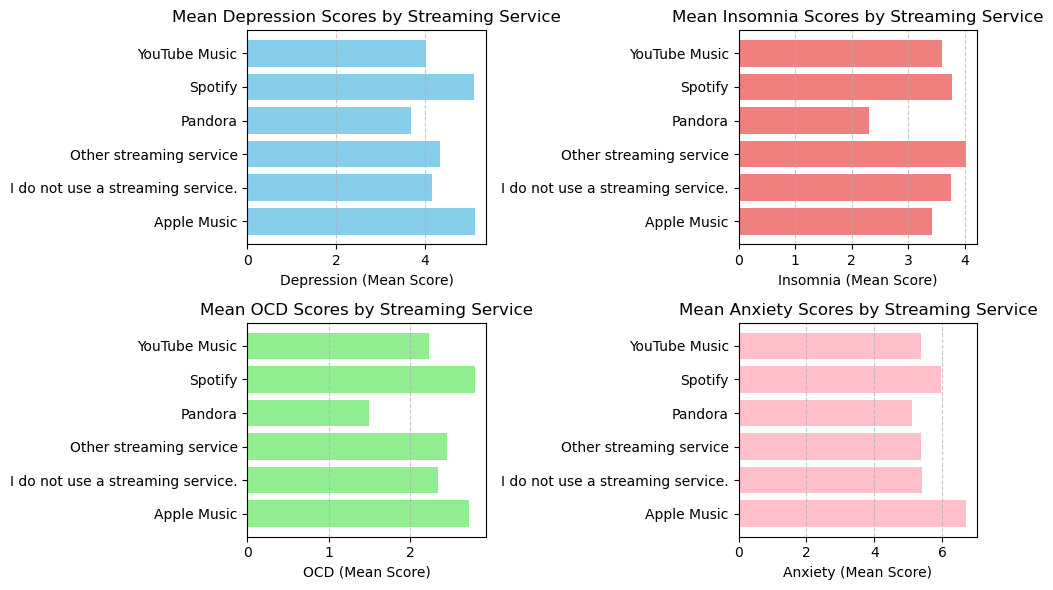

In [53]:
# Colors for each plot 
colors = ['skyblue', 'lightcoral', 'lightgreen', 'pink']

# Create bar plots for each mental health condition
conditions = ["Depression", "Insomnia", "OCD", "Anxiety"]
plt.figure(figsize=(10, 6))

for i, (condition, color) in enumerate(zip(conditions, colors)):
    # Sort the DataFrame by the current condition in descending order
    sorted_df = streaming_grouped_means.sort_values(by=condition, ascending=False)
    plt.subplot(2, 2, i+1)
    plt.barh(streaming_grouped_means["Primary streaming service"], streaming_grouped_means[condition], color=color)
    plt.xlabel(f'{condition} (Mean Score)')
    plt.title(f'Mean {condition} Scores by Streaming Service')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Hours Spent on Music and Mental Health​

In [54]:
# Narrow down the DataFrame to columns needed for analysis
hours_spent_df = cleaned_survey_copy[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
hours_spent_copy = hours_spent_df.copy()
hours_spent_copy

,Hours per day,Anxiety,Depression,Insomnia,OCD
2,4.0,7.0,7.0,10.0,2.0
3,2.5,9.0,7.0,3.0,3.0
4,4.0,7.0,2.0,5.0,9.0
5,5.0,8.0,8.0,7.0,7.0
6,3.0,4.0,8.0,6.0,0.0
...,...,...,...,...,...
731,2.0,7.0,6.0,0.0,9.0
732,1.0,3.0,2.0,2.0,5.0
733,6.0,2.0,2.0,2.0,2.0
734,5.0,2.0,3.0,2.0,1.0


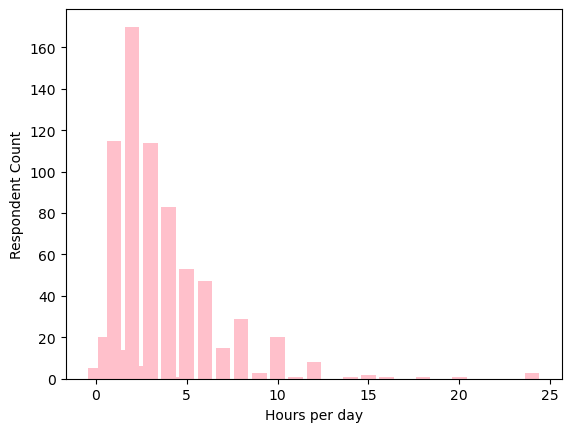

In [55]:
hrs_counts = hours_spent_copy['Hours per day'].value_counts()
plt.bar(hrs_counts.index, hrs_counts.values, color= 'pink', align='center')
plt.xlabel('Hours per day')
plt.ylabel('Respondent Count')
plt.show()

In [56]:
# Divide data into 5 groups based on the hours spent listening to music a day
bins = [0, 5, 10, 15, 20, 24]
group_names = ['0 to 5 hrs/day', '6 to 10 hrs/day', '11 to 15 hrs/day', '16 to 20 hrs/day', '21 to 24 hrs/day']
hours_spent_copy['hrs/day group'] = pd.cut(hours_spent_copy['Hours per day'], bins, labels=group_names, include_lowest=True)
hours_spent_copy

,Hours per day,Anxiety,Depression,Insomnia,OCD,hrs/day group
2,4.0,7.0,7.0,10.0,2.0,0 to 5 hrs/day
3,2.5,9.0,7.0,3.0,3.0,0 to 5 hrs/day
4,4.0,7.0,2.0,5.0,9.0,0 to 5 hrs/day
5,5.0,8.0,8.0,7.0,7.0,0 to 5 hrs/day
6,3.0,4.0,8.0,6.0,0.0,0 to 5 hrs/day
...,...,...,...,...,...,...
731,2.0,7.0,6.0,0.0,9.0,0 to 5 hrs/day
732,1.0,3.0,2.0,2.0,5.0,0 to 5 hrs/day
733,6.0,2.0,2.0,2.0,2.0,6 to 10 hrs/day
734,5.0,2.0,3.0,2.0,1.0,0 to 5 hrs/day


In [57]:
# Calculate the average score of the mental health issue for each group and see whether there is any trend
hours_grp = hours_spent_copy.groupby("hrs/day group")
round(hours_grp.mean(), 2).reset_index()

/var/folders/16/qt_t7c5n31q5g2k_npqy3ryw0000gn/T/ipykernel_74955/1484570698.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_grp = hours_spent_copy.groupby("hrs/day group")


,hrs/day group,Hours per day,Anxiety,Depression,Insomnia,OCD
0,0 to 5 hrs/day,2.47,5.82,4.74,3.59,2.51
1,6 to 10 hrs/day,7.42,6.00,4.94,4.11,3.16
2,11 to 15 hrs/day,12.58,5.50,6.92,5.83,3.00
3,16 to 20 hrs/day,18.00,6.67,6.67,6.67,8.00
4,21 to 24 hrs/day,24.00,4.00,2.00,3.00,1.33


In [58]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    x_values = df[x_col]
    y_values = df[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r value is: {rvalue}")
    print(f"The r^2 value is: {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_equation = "y= " + str(round(slope,2))+ "x+ " +str(round(intercept,2))
    df.plot(kind = 'scatter', x= x_col, y= y_col, xlabel= 'Hours per day', ylabel= y_col, title= f'Hours per day vs {y_col}')
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equation, (0,32), fontsize=12, color='r')
    plt.show()

The r value is: 0.04547606486214143
The r^2 value is: 0.0020680724753456945


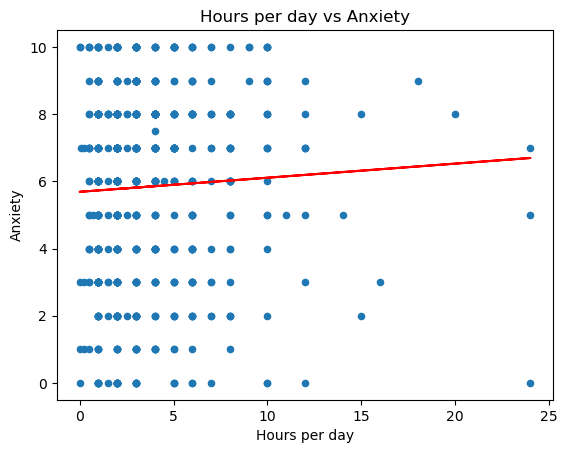

In [59]:
# Anxiety vs. Hours per day Linear Regression Plot
plot_linear_regression(hours_spent_copy, 'Hours per day', 'Anxiety')

The r value is: 0.09725860809806652
The r^2 value is: 0.009459236849173292


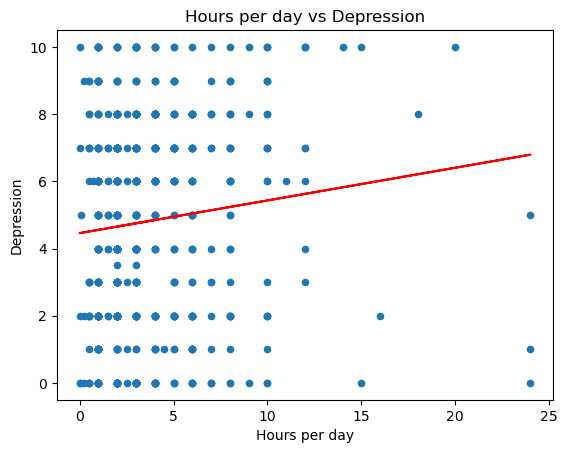

In [60]:
# Depression vs. Hours per day Linear Regression Plot
plot_linear_regression(hours_spent_copy, 'Hours per day', 'Depression')

The r value is: 0.13549301536320302
The r^2 value is: 0.01835835721221317


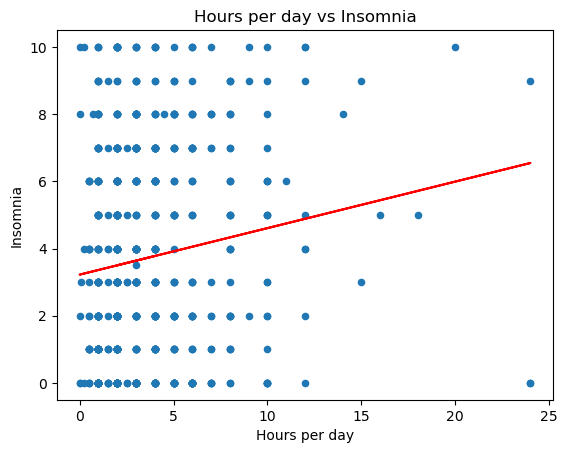

In [61]:
# Insomnia vs. Hours per day Linear Regression Plot
plot_linear_regression(hours_spent_copy, 'Hours per day', 'Insomnia')

The r value is: 0.11358354898678025
The r^2 value is: 0.012901222600432308


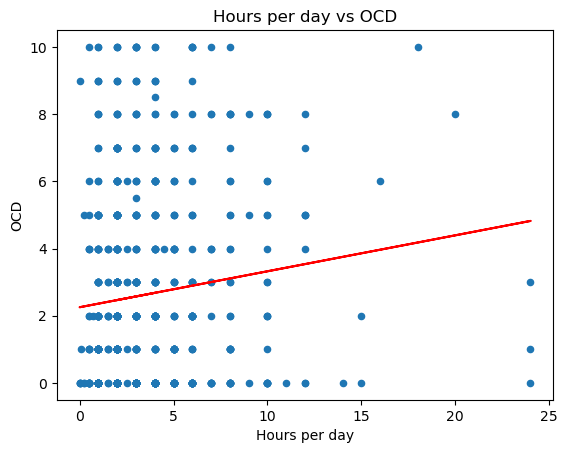

In [62]:
# OCD vs. Hours per day Linear Regression Plot
plot_linear_regression(hours_spent_copy, 'Hours per day', 'OCD')

### Impact of Favorite Genre on Mental Health ​

In [63]:
#Reduce DataFrame to pertinent columns
favorite_genre_df=cleaned_survey_copy[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
favorite_genre_df

,Fav genre,Anxiety,Depression,Insomnia,OCD
2,Video game music,7.0,7.0,10.0,2.0
3,Jazz,9.0,7.0,3.0,3.0
4,R&B,7.0,2.0,5.0,9.0
5,Jazz,8.0,8.0,7.0,7.0
6,Video game music,4.0,8.0,6.0,0.0
...,...,...,...,...,...
731,Rock,7.0,6.0,0.0,9.0
732,Pop,3.0,2.0,2.0,5.0
733,Rap,2.0,2.0,2.0,2.0
734,Classical,2.0,3.0,2.0,1.0


In [64]:
# Group by 'Fav genre' and calculate the mean for each column
genre_grouped_means = favorite_genre_df.groupby('Fav genre').mean().reset_index()
genre_grouped_means

,Fav genre,Anxiety,Depression,Insomnia,OCD
0,Classical,4.901961,4.058824,3.686275,2.372549
1,Country,5.250000,4.166667,2.458333,2.583333
2,EDM,5.361111,5.111111,3.944444,2.888889
3,Folk,6.689655,5.137931,3.724138,2.275862
4,Gospel,4.833333,2.666667,5.333333,0.333333
5,Hip hop,6.117647,5.882353,3.470588,2.588235
6,Jazz,5.900000,4.500000,3.850000,2.800000
7,K pop,6.523810,3.904762,3.190476,2.476190
8,Latin,5.000000,4.500000,4.500000,2.500000
9,Lofi,6.100000,6.600000,5.600000,3.400000


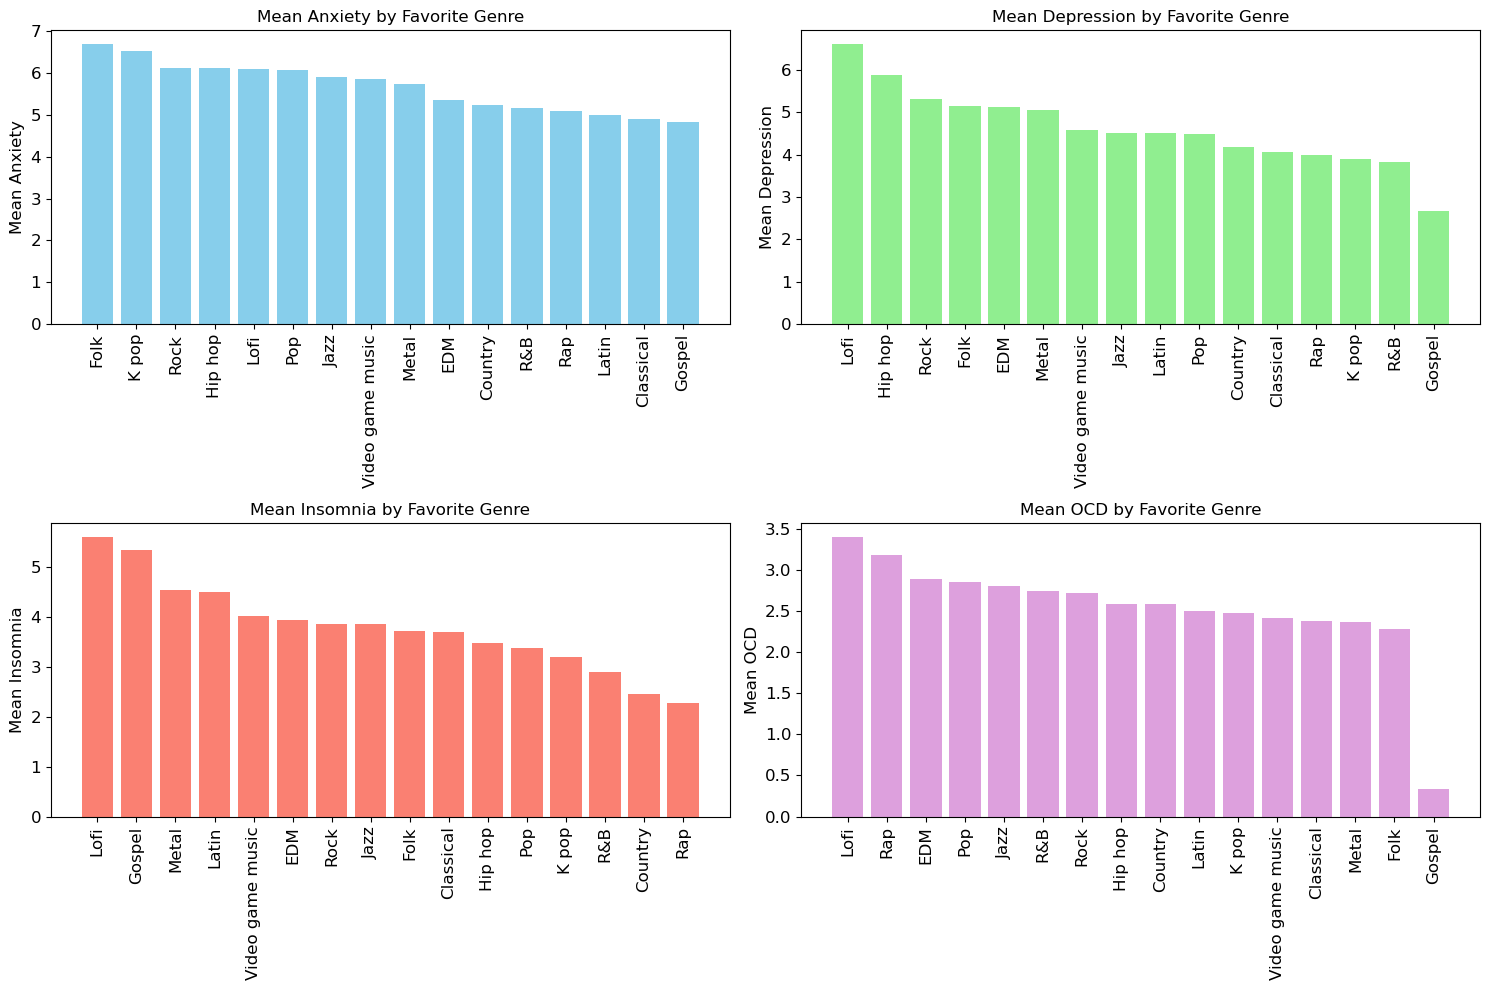

In [65]:
# Define colors for each of the four bar plots
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Plotting the means for each column with sorting and custom colors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x2 subplot

# Font size
font_size = 12

# Sort and plot for 'Anxiety'
sorted_anxiety = genre_grouped_means.sort_values(by='Anxiety', ascending=False)
axes[0, 0].bar(sorted_anxiety['Fav genre'], sorted_anxiety['Anxiety'], color=colors[0])
axes[0, 0].set_title('Mean Anxiety by Favorite Genre', fontsize=font_size)
axes[0, 0].set_ylabel('Mean Anxiety', fontsize=font_size)
axes[0, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Depression'
sorted_depression = genre_grouped_means.sort_values(by='Depression', ascending=False)
axes[0, 1].bar(sorted_depression['Fav genre'], sorted_depression['Depression'], color=colors[1])
axes[0, 1].set_title('Mean Depression by Favorite Genre', fontsize=font_size)
axes[0, 1].set_ylabel('Mean Depression', fontsize=font_size)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 1].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Insomnia'
sorted_insomnia = genre_grouped_means.sort_values(by='Insomnia', ascending=False)
axes[1, 0].bar(sorted_insomnia['Fav genre'], sorted_insomnia['Insomnia'], color=colors[2])
axes[1, 0].set_title('Mean Insomnia by Favorite Genre', fontsize=font_size)
axes[1, 0].set_ylabel('Mean Insomnia', fontsize=font_size)
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'OCD'
sorted_ocd = genre_grouped_means.sort_values(by='OCD', ascending=False)
axes[1, 1].bar(sorted_ocd['Fav genre'], sorted_ocd['OCD'], color=colors[3])
axes[1, 1].set_title('Mean OCD by Favorite Genre', fontsize=font_size)
axes[1, 1].set_ylabel('Mean OCD', fontsize=font_size)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 1].tick_params(axis='y', labelsize=font_size)

plt.tight_layout()
plt.show()

### Music Effects on Mental Health Conditions​

In [66]:
music_effect_df = cleaned_survey_copy.copy()

# assign a value on effect 
mapping = {"Improve": +1, "No effect": 0, "Worsen": -1}
music_effect_df["Music effects value"] = music_effect_df["Music effects"].map(mapping)
music_effect_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Music effects value
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,1
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,1
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,1
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.,1
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,1
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,1
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,1


In [67]:
music_grouped_counts = music_effect_df.groupby(['Anxiety', 'Music effects']).size().reset_index(name='count')
music_grouped_counts.head()

,Anxiety,Music effects,count
0,0.0,Improve,19
1,0.0,No effect,15
2,1.0,Improve,17
3,1.0,No effect,11
4,2.0,Improve,29


In [68]:
pivot_table = music_grouped_counts.pivot_table(
    index='Anxiety',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Anxiety                                  
0.0               19.0       15.0     0.0
1.0               17.0       11.0     0.0
2.0               29.0       14.0     1.0
3.0               42.0       21.0     2.0
4.0               42.0       11.0     1.0
5.0               44.0       14.0     1.0
6.0               66.0       16.0     1.0
7.0               99.0       16.0     4.0
7.5                1.0        0.0     0.0
8.0               88.0       22.0     3.0
9.0               39.0       14.0     0.0
10.0              49.0       12.0     4.0


<Axes: title={'center': 'Music Effects on Anxiety Level'}, xlabel='Anxiety Level', ylabel='Number of People'>

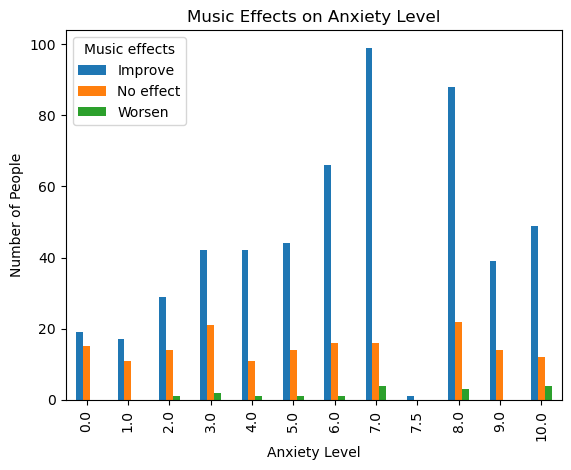

In [69]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Anxiety Level", title="Music Effects on Anxiety Level") 

In [70]:
music_grouped_counts = music_effect_df.groupby(["Depression", "Music effects"]).size().reset_index(name='count')
music_grouped_counts.head()

,Depression,Music effects,count
0,0.0,Improve,51
1,0.0,No effect,29
2,0.0,Worsen,1
3,1.0,Improve,33
4,1.0,No effect,7


In [71]:
pivot_table = music_grouped_counts.pivot_table(
    index='Depression',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Depression                               
0.0               51.0       29.0     1.0
1.0               33.0        7.0     0.0
2.0               62.0       26.0     1.0
3.0               44.0       12.0     0.0
3.5                2.0        0.0     0.0
4.0               49.0        8.0     1.0
5.0               39.0       14.0     2.0
6.0               70.0       16.0     1.0
7.0               69.0       23.0     2.0
8.0               65.0       10.0     1.0
9.0               28.0        7.0     2.0
10.0              23.0       14.0     6.0


<Axes: title={'center': 'Music Effects on Depression Level'}, xlabel='Depression Level', ylabel='Number of People'>

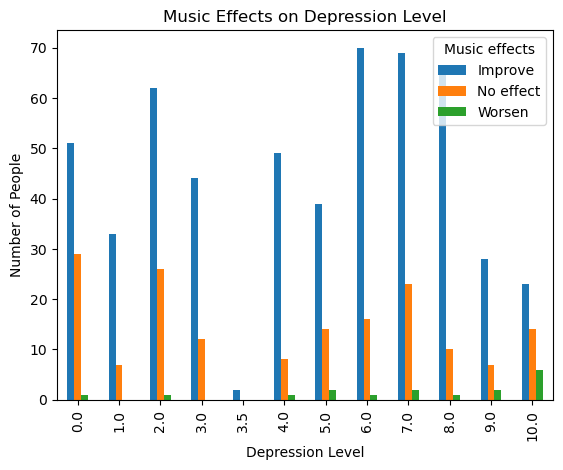

In [72]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Depression Level", title="Music Effects on Depression Level") 

In [73]:
music_grouped_counts = music_effect_df.groupby(["Insomnia", "Music effects"]).size().reset_index(name='count')
music_grouped_counts.head()

,Insomnia,Music effects,count
0,0.0,Improve,104
1,0.0,No effect,42
2,0.0,Worsen,2
3,1.0,Improve,63
4,1.0,No effect,16


In [74]:
pivot_table = music_grouped_counts.pivot_table(
    index='Insomnia',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
Insomnia                                 
0.0              104.0       42.0     2.0
1.0               63.0       16.0     1.0
2.0               62.0       21.0     1.0
3.0               50.0       14.0     3.0
3.5                1.0        0.0     0.0
4.0               43.0       13.0     2.0
5.0               48.0        6.0     1.0
6.0               44.0       14.0     2.0
7.0               44.0       13.0     2.0
8.0               37.0       10.0     2.0
9.0               20.0        5.0     0.0
10.0              19.0       12.0     1.0


<Axes: title={'center': 'Music Effects on Insomnia Level'}, xlabel='Insomnia Level', ylabel='Number of People'>

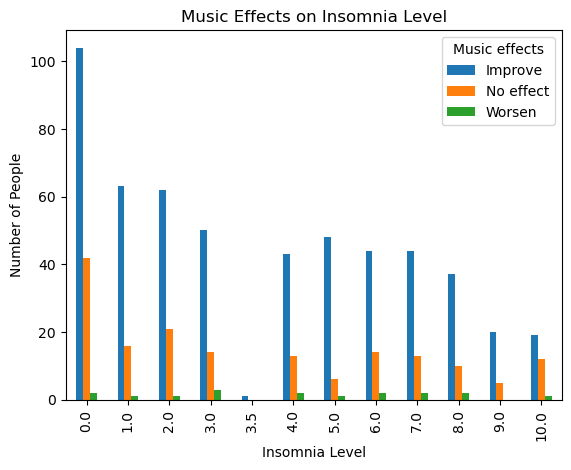

In [75]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="Insomnia Level", title="Music Effects on Insomnia Level") 

In [76]:
music_grouped_counts = music_effect_df.groupby(["OCD", "Music effects"]).size().reset_index(name='count')
music_grouped_counts.head()

,OCD,Music effects,count
0,0.0,Improve,174
1,0.0,No effect,64
2,0.0,Worsen,4
3,1.0,Improve,65
4,1.0,No effect,25


In [77]:
pivot_table = music_grouped_counts.pivot_table(
    index='OCD',       # Rows will be anxiety levels
    columns='Music effects',  # Columns will be music effects
    values='count',        # Values will be counts
    fill_value=0           # Fill missing values with 0
)

print(pivot_table)

Music effects  Improve  No effect  Worsen
OCD                                      
0.0              174.0       64.0     4.0
1.0               65.0       25.0     3.0
2.0               71.0       20.0     2.0
3.0               50.0       11.0     2.0
4.0               38.0        9.0     1.0
5.0               44.0        7.0     1.0
5.5                1.0        0.0     0.0
6.0               26.0        6.0     1.0
7.0               17.0       12.0     1.0
8.0               22.0        5.0     1.0
8.5                1.0        0.0     0.0
9.0               13.0        1.0     0.0
10.0              13.0        6.0     1.0


<Axes: title={'center': 'Music Effects on OCD Level'}, xlabel='OCD Level', ylabel='Number of People'>

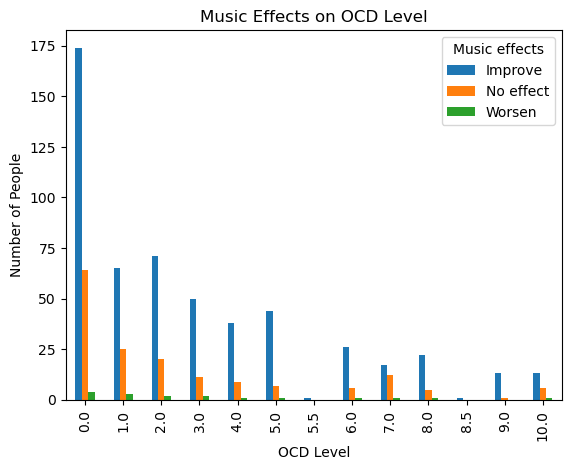

In [78]:
pivot_table.plot(kind="bar", ylabel="Number of People", xlabel="OCD Level", title="Music Effects on OCD Level") 